# CORONARY ARTERY DIAGNOSIS

Coronary artery disease (CAD) is the most common cardiovascular disease (CVD) and often leads to a heart attack. It annually causes millions of deaths and billions of dollars in financial losses worldwide. Angiography, which is invasive and risky, is the standard procedure for diagnosing CAD. Alternatively, machine learning (ML) techniques have been widely used in the literature as fast, affordable, and noninvasive approaches for CAD detection. The World Health Organization (WHO) has listed cardiovascular diseases (CVDs) as the leading cause of death around the globe. As the most common type of CVD, coronary artery disease (CAD) occurs when there is an obstruction (of more than 50%) in at least one of the coronary arteries. There are three major arteries of the heart: (i) left anterior descending artery (LAD), (ii) left circumflex artery (LCX) and (iii) right coronary artery (RCA) (see Fig. 1a). CAD mortality rates differ among the regions of the world, as shown in Fig. 1c. These rates are much higher in Asia, Russia, and the Middle East compared to the rest of the world. Hence, providing precise diagnostic and preventive methods can have a momentous impact on reducing mortality due to CAD.

Early detection of CAD is critical to avoid further increase in the risk. Coronary angiography is required to conclusively diagnose CAD. However, it is invasive and may lead to various complications, such as artery dissection, arrhythmia and even death. Moreover, image-based detection techniques are costly and not applicable for screening large populations, especially in developing countries. Due to these shortcomings and the life-threatening nature of angiography, researchers have been continuously looking for noninvasive, economical, fast, and reliable techniques for early detection of CAD. ML algorithms are some of the techniques used for this purpose.

IMPORTING DEPENDENCIES

In [48]:
#!pip install tensorflow


In [49]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# DATA PRE PROCESSING

In [50]:
df=pd.read_csv(r"C:\Users\abhay\OneDrive\Desktop\New folder\dataset.csv")

In [51]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [52]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [53]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [54]:
print("Shape of Dataframe: {}".format(df.shape))

Shape of Dataframe: (303, 14)


In [55]:
#handling NaN values
data = df[~df.isin(['?'])]

In [56]:
data = data.dropna(axis=0)

In [57]:
print("Shape of Dataframe after dropping: {}".format(df.shape))

Shape of Dataframe after dropping: (303, 14)


In [58]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [59]:
#converting data from categorical to numerical
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# EXPLORATORY DATA ANALYSIS

In [60]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope','ca','thalassemia','target']

In [61]:
# converting features to categorical features 
df['chest_pain_type'][df['chest_pain_type'] == 0] = 'typical angina '
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'non-angina pain'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'Abnormality in ST-T wave'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 0] = 'upsloping'
df['st_slope'][df['st_slope'] == 1] = 'flat'
df['st_slope'][df['st_slope'] == 2] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 0] = 'null'
df['thalassemia'][df['thalassemia'] == 1] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 2] = 'normal blood flow'
df['thalassemia'][df['thalassemia'] == 3] = 'reversible defect'

df["sex"] = df.sex.apply(lambda  x:'male' if x==1 else 'female')

In [62]:
df.describe()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.148515,149.646865,0.326733,1.039604,0.729373,0.544554
std,9.082101,17.538143,51.830751,0.356198,22.905161,0.469794,1.161075,1.022606,0.498835
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,0.000000,153.000000,0.000000,0.800000,0.000000,1.000000
75%,61.000000,140.000000,274.500000,0.000000,166.000000,1.000000,1.600000,1.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,202.000000,1.000000,6.200000,4.000000,1.000000


In [63]:
df['chest_pain_type'].value_counts()

typical angina     143
non-angina pain     87
atypical angina     50
asymptomatic        23
Name: chest_pain_type, dtype: int64

In [64]:
df['rest_ecg'].value_counts()

Abnormality in ST-T wave        152
normal                          147
left ventricular hypertrophy      4
Name: rest_ecg, dtype: int64

In [65]:
df['st_slope'].value_counts()

downsloping    142
flat           140
upsloping       21
Name: st_slope, dtype: int64

In [66]:
df['thalassemia'].value_counts()

normal blood flow    166
reversible defect    117
fixed defect          18
null                   2
Name: thalassemia, dtype: int64

In [67]:
df.describe(include =[object])

,sex,chest_pain_type,rest_ecg,st_slope,thalassemia
count,303,303,303,303,303
unique,2,4,3,3,4
top,male,typical angina,Abnormality in ST-T wave,downsloping,normal blood flow
freq,207,143,152,142,166


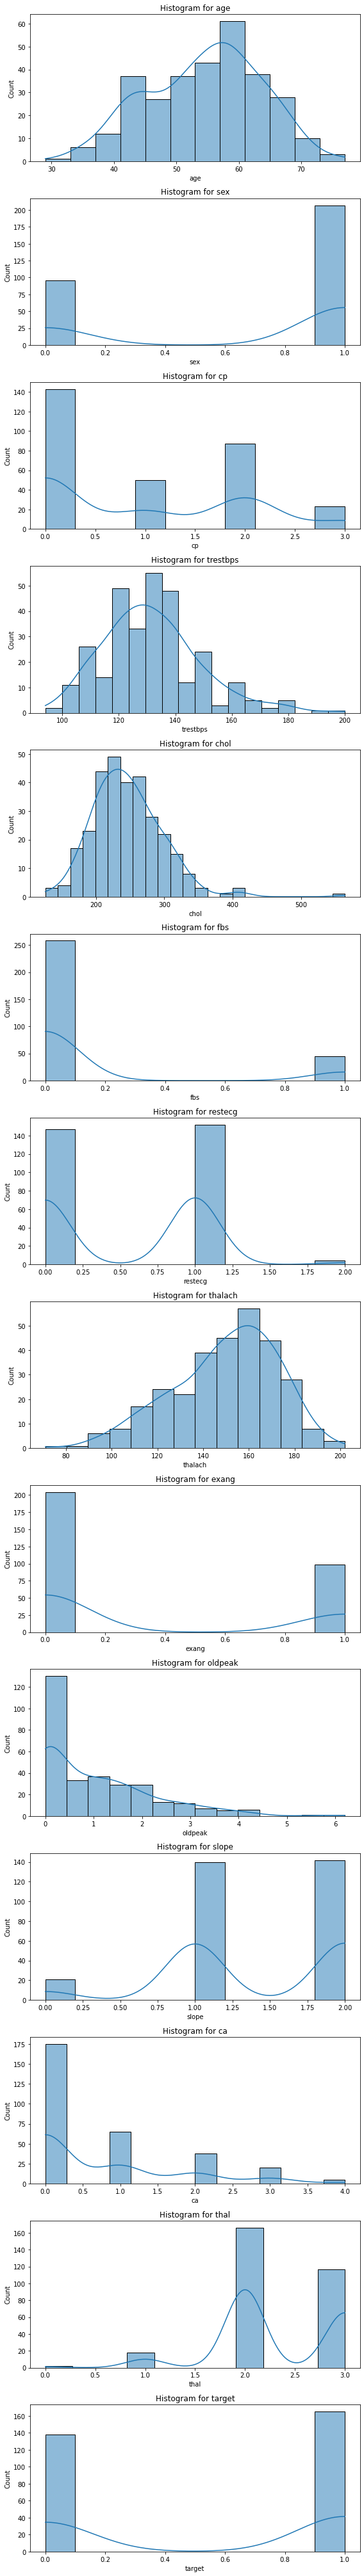

In [68]:
columns_to_plot = data.columns

fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(8, 4 * len(columns_to_plot)))

for i, column in enumerate(columns_to_plot):
    sns.histplot(data=data, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram for {column}')

plt.tight_layout()
plt.show()

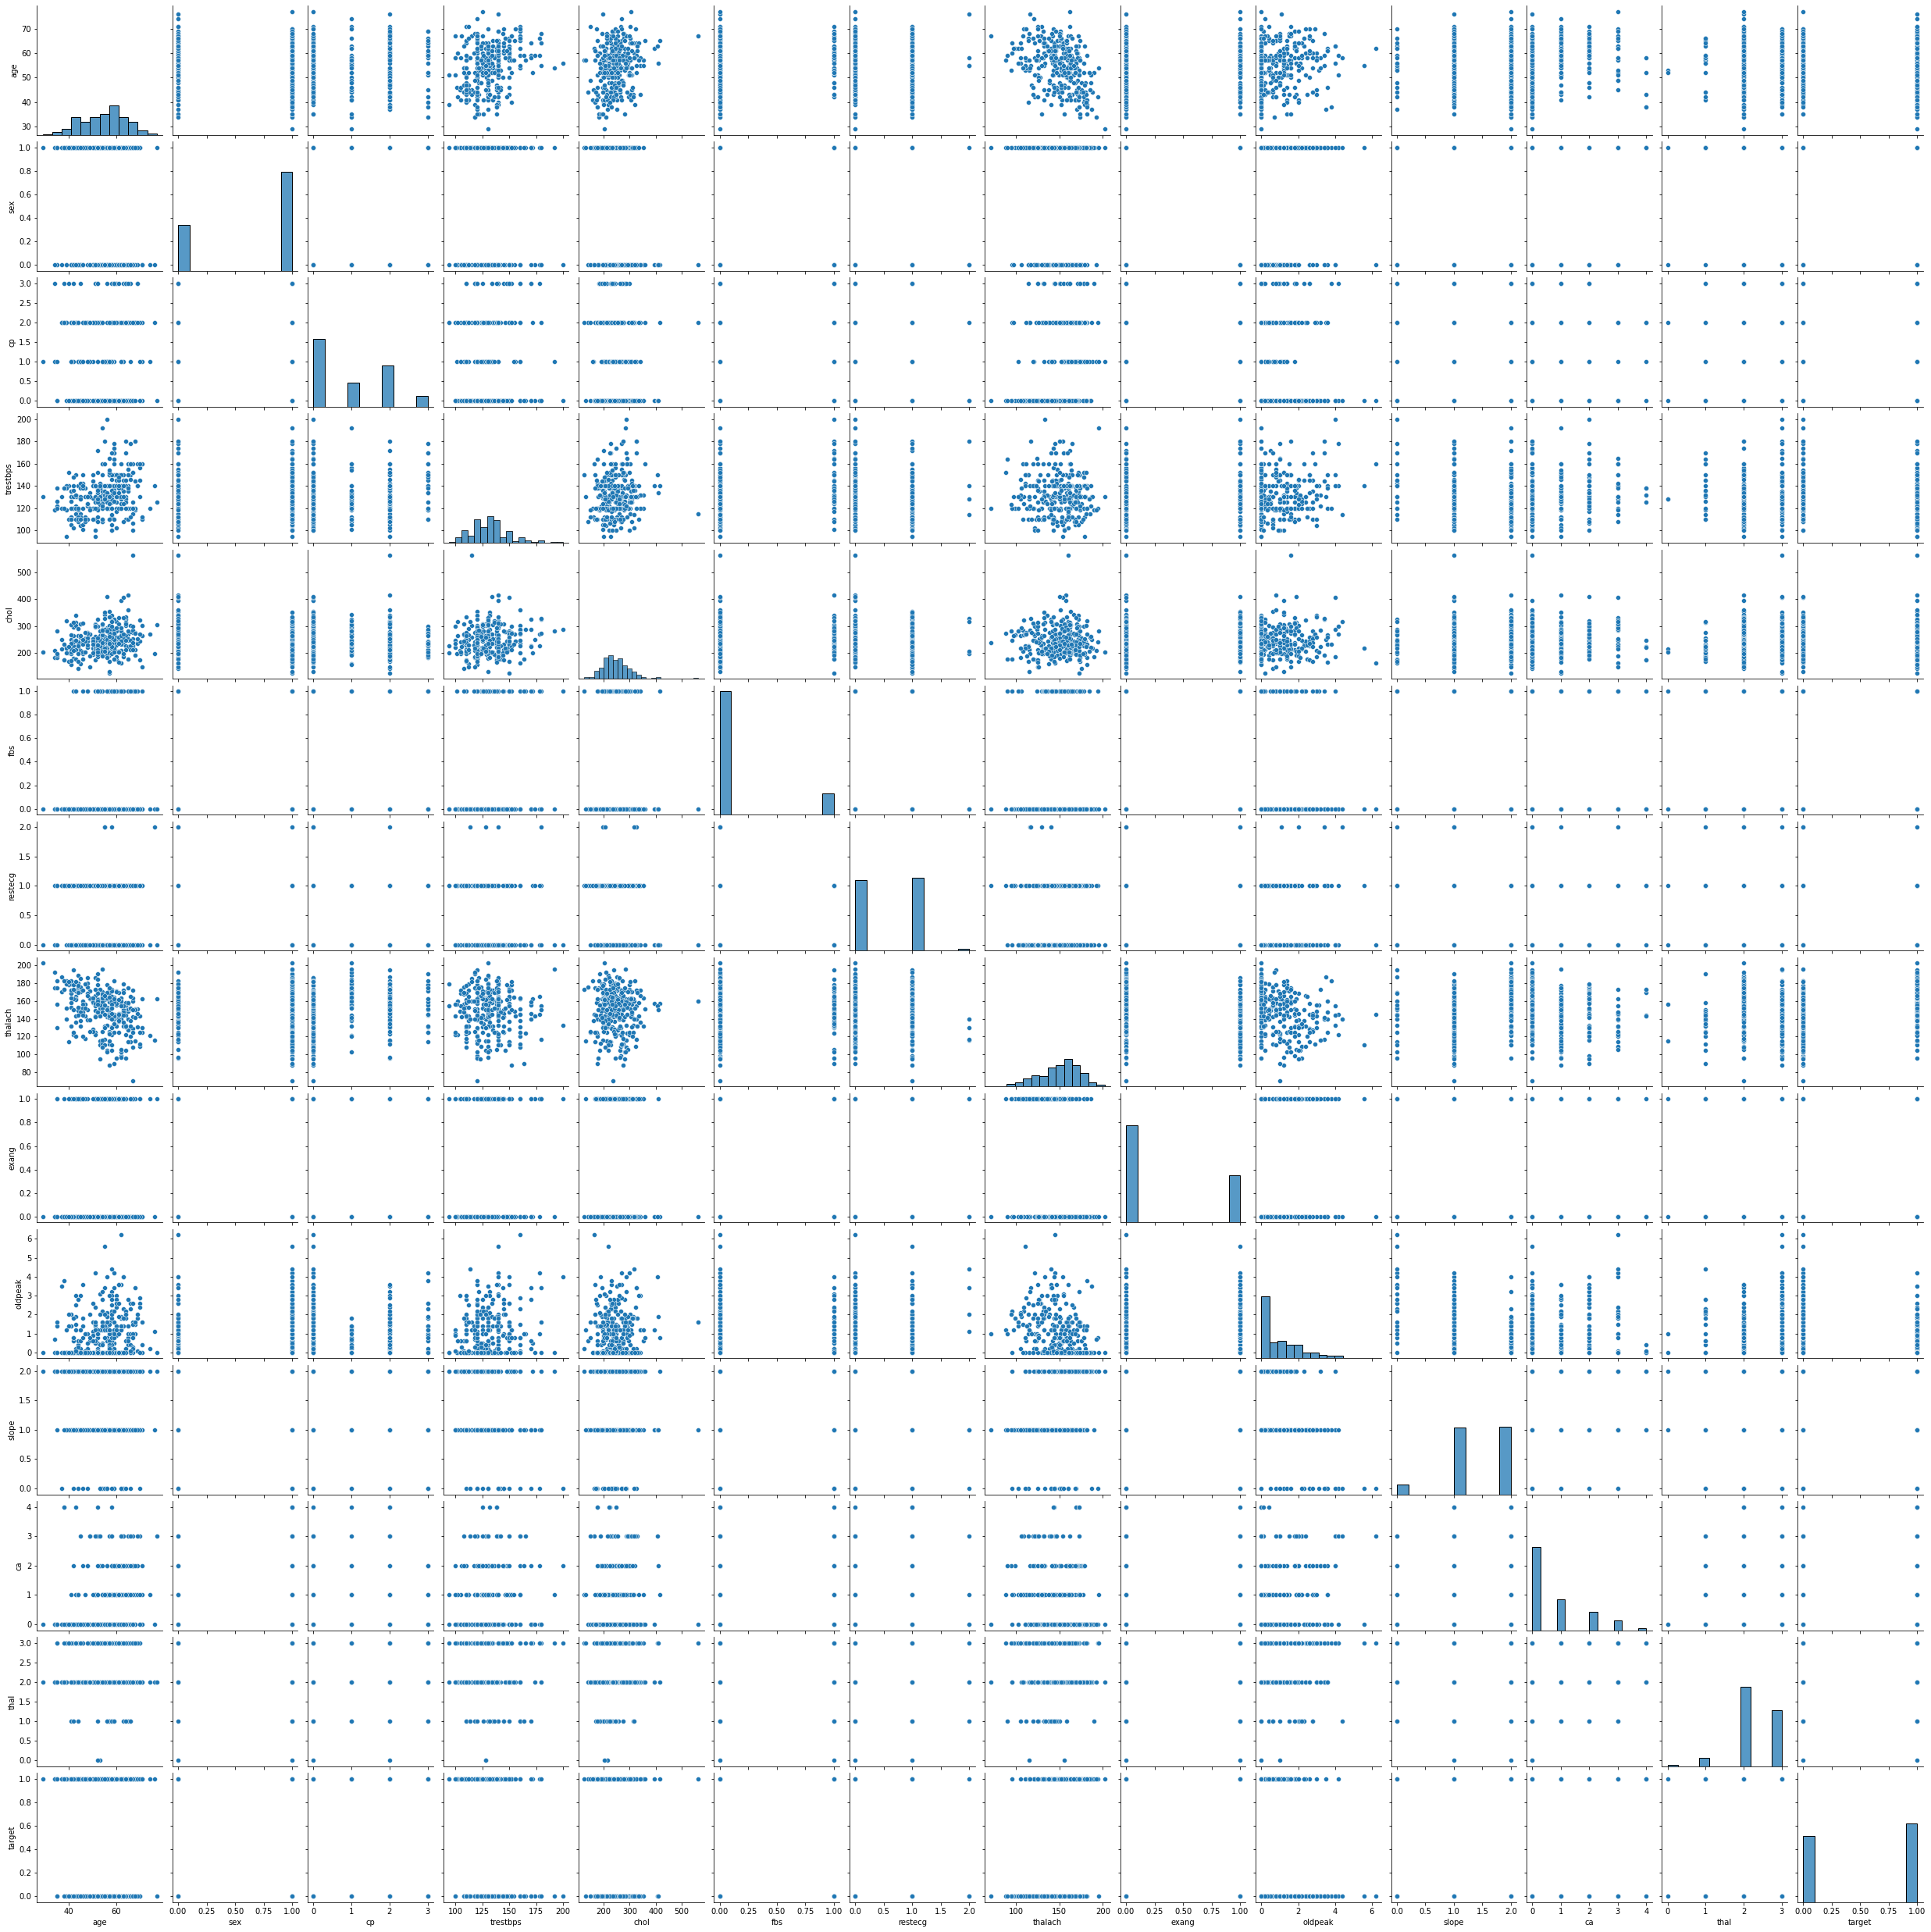

In [69]:
sns.pairplot(data)
plt.show()

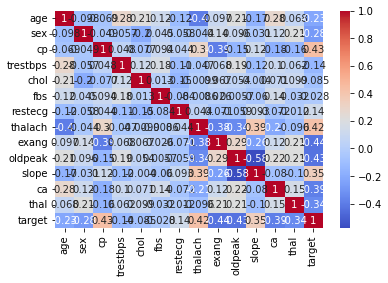

In [70]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

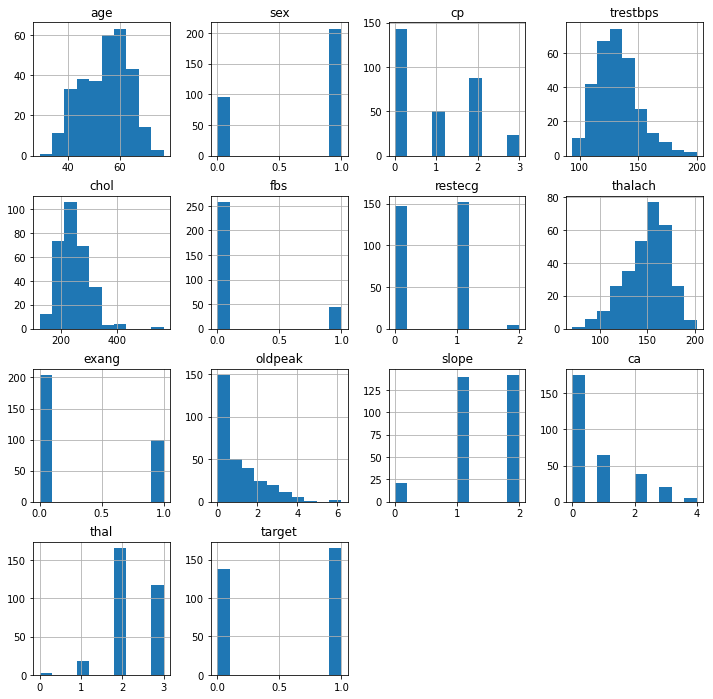

In [71]:
data.hist(figsize=(12, 12))
plt.show()

DISTRIBUTION OF CORONARY ARTERY ON THE BASIS OF TARGET

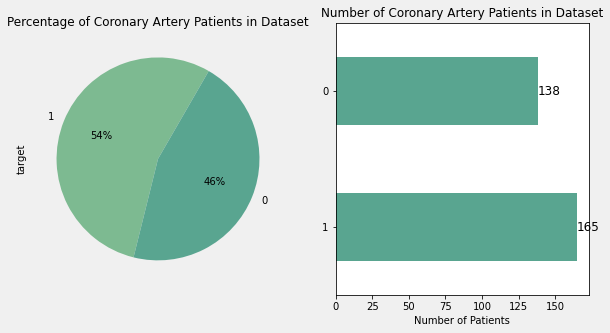

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10, 5), facecolor=(.94, .94, .94))


# Pie chart
ax1 = df['target'].value_counts().plot.pie(autopct="%1.0f%%", startangle=60, ax=ax1, colors=sns.color_palette("crest"))
ax1.set(title='Percentage of Coronary Artery Patients in Dataset')

# Bar chart
ax2 = df["target"].value_counts().plot(kind="barh", ax=ax2, color=sns.color_palette("crest")[1])
for x, y in enumerate(df["target"].value_counts().values):
    ax2.text(y, x, str(y), fontsize=12, va='center')
ax2.set(title='Number of Coronary Artery Patients in Dataset', xlabel='Number of Patients')

plt.show()

ax1.set(title='Percentage of Coronary Artery Patients in Dataset')

# Bar chart
ax2 = df["target"].value_counts().plot(kind="barh", ax=ax2, color=sns.color_palette("crest")[1])
for x, y in enumerate(df["target"].value_counts().values):
    ax2.text(y, x, str(y), fontsize=12, va='center')
ax2.set(title='Number of Coronary Artery Patients in Dataset', xlabel='Number of Patients')

plt.show()


GENDER AND AGE WISE DISTRIBUTION

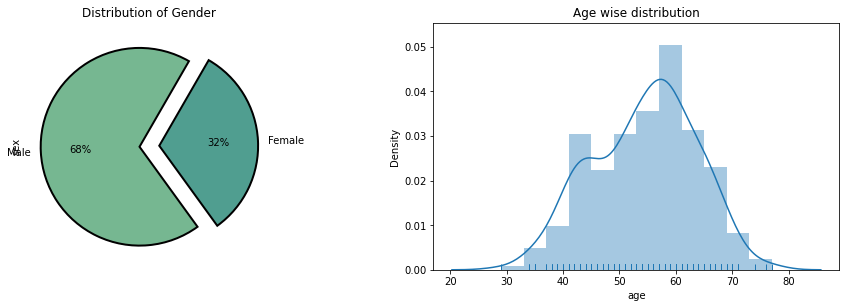

In [73]:
plt.figure(figsize=(16,10))
plt.subplot(221)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("crest",5), startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =False)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['age'], rug=True)
plt.title("Age wise distribution")
plt.show()

DISTRIBUTION OF NORMAL AND DIAGNOSED PATIENTS

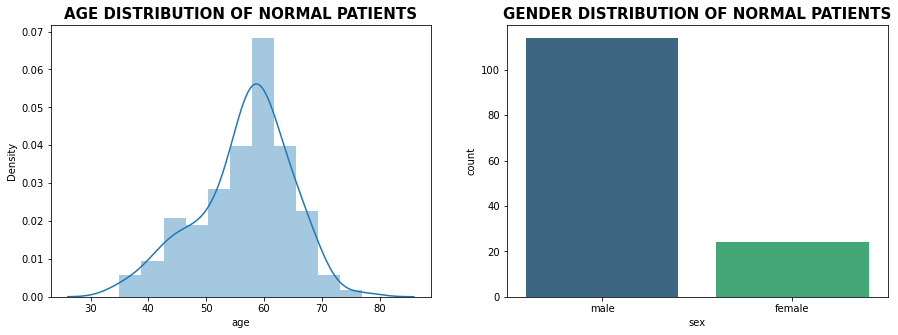

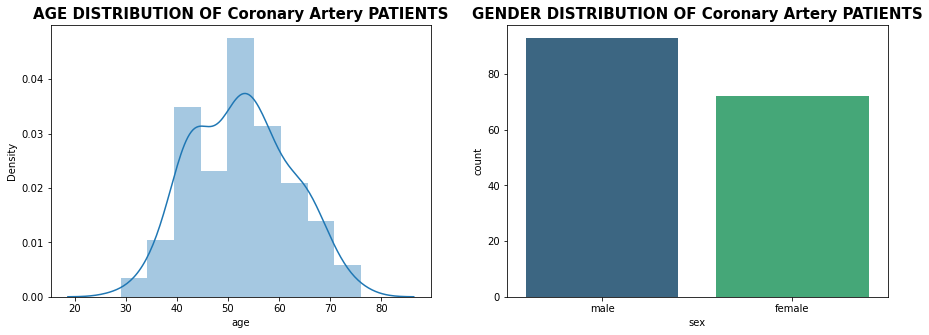

In [74]:
df_1=df[df['target']==1]

df_0=df[df['target']==0]

# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_0['age'])
plt.title('AGE DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_0['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )
plt.show()

#plotting CAD patients

fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.distplot(df_1['age'])
plt.title('AGE DISTRIBUTION OF Coronary Artery PATIENTS', fontsize=15, weight='bold')

ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x=df_1['sex'], palette='viridis')
plt.title('GENDER DISTRIBUTION OF Coronary Artery PATIENTS', fontsize=15, weight='bold' )
plt.show()

DISTRIBUTION OF CHEST PAIN TYPE

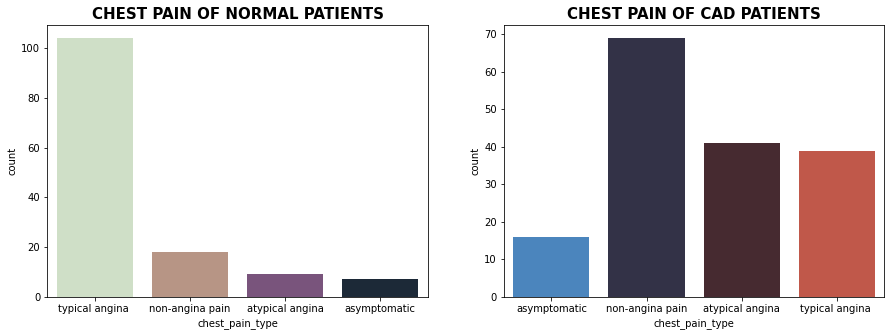

In [75]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['chest_pain_type'],palette = 'ch:start=4.2,rot=-3.3')
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting CAD patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['chest_pain_type'], palette='icefire')
plt.title('CHEST PAIN OF CAD PATIENTS', fontsize=15, weight='bold' )

plot_criteria= ['chest_pain_type', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

plt.show()

DISTRIBUTION OF REST ECG

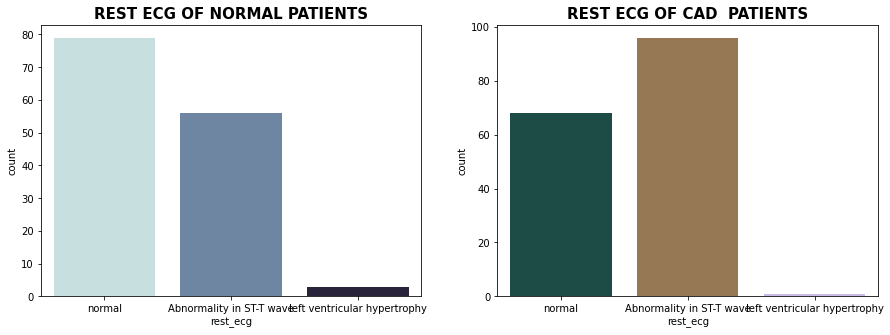

In [76]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['rest_ecg'], palette ='ch:start=.2,rot=-.3')
plt.title('REST ECG OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting CAD  patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['rest_ecg'], palette='cubehelix')
plt.title('REST ECG OF CAD  PATIENTS', fontsize=15, weight='bold' )

#Exploring the CAD  Disease patients based on REST ECG
plot_criteria= ['rest_ecg', 'target']
cm = sns.light_palette("white", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

plt.show()

DISTRIBUTION OF ST_SLOPE

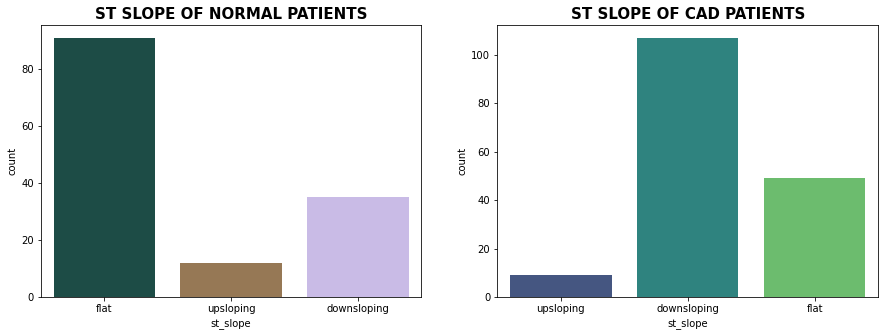

In [77]:
# plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['st_slope'],palette='cubehelix')
plt.title('ST SLOPE OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting CAD patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['st_slope'], palette='viridis')
plt.title('ST SLOPE OF CAD PATIENTS', fontsize=15, weight='bold' )

plot_criteria= ['st_slope', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

plt.show()

DISTRIBUTION OF THALASSEMIA

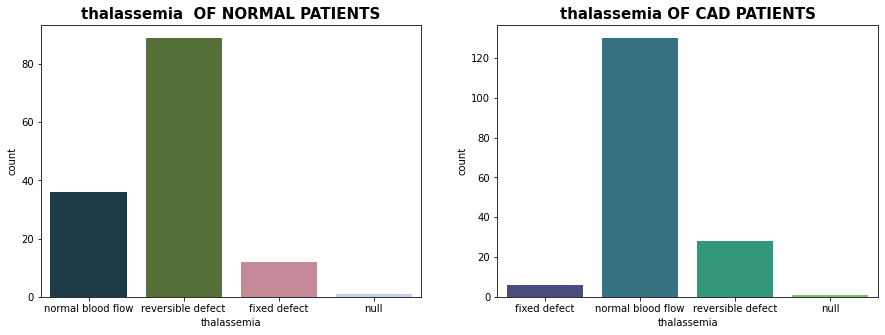

In [78]:
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(x =df_0['thalassemia'],palette='cubehelix')
plt.title('thalassemia  OF NORMAL PATIENTS', fontsize=15, weight='bold')

#plotting CAD patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(x =df_1['thalassemia'], palette='viridis')
plt.title('thalassemia OF CAD PATIENTS', fontsize=15, weight='bold' )

plot_criteria= ['thalassemia', 'target']
cm = sns.light_palette("green", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

plt.show()

DISTRIBUTION OF NUMERICAL FEATURES

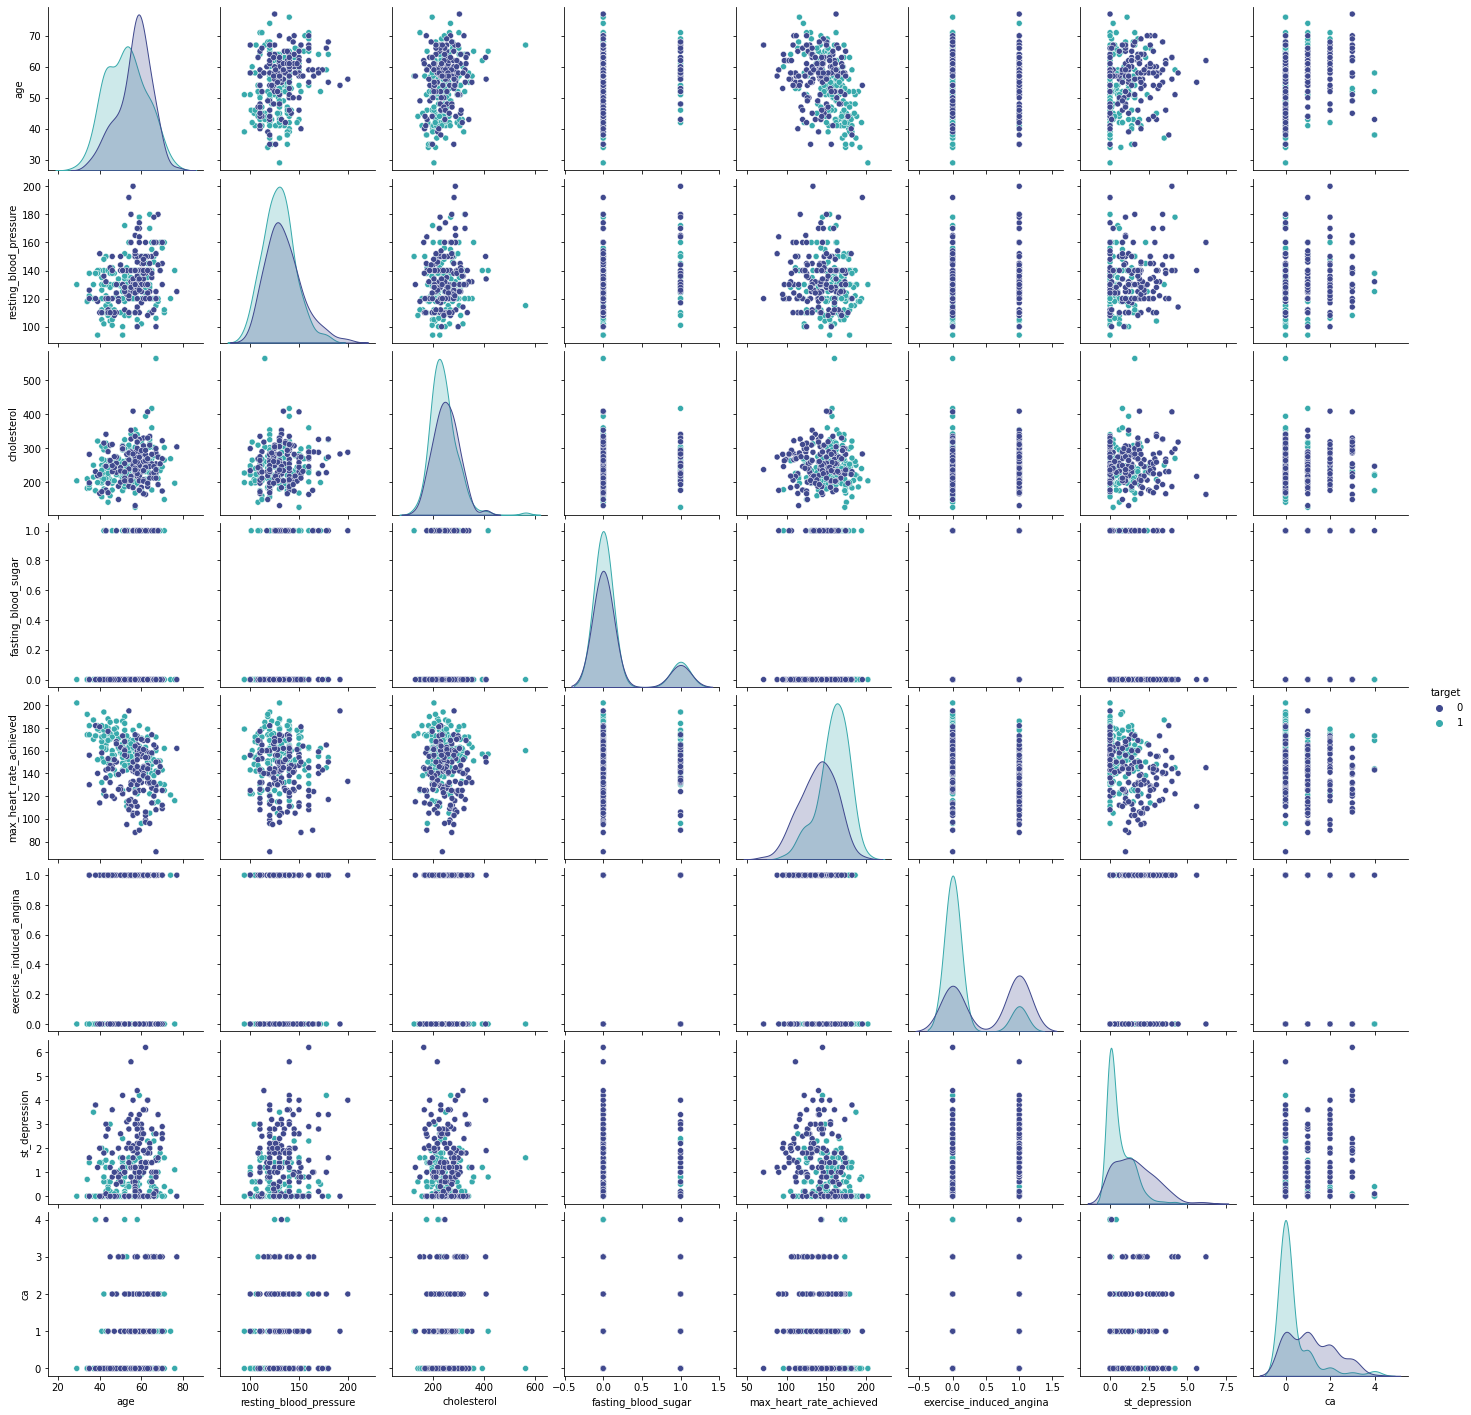

In [79]:
sns.pairplot(df, hue = 'target',palette = 'mako' )

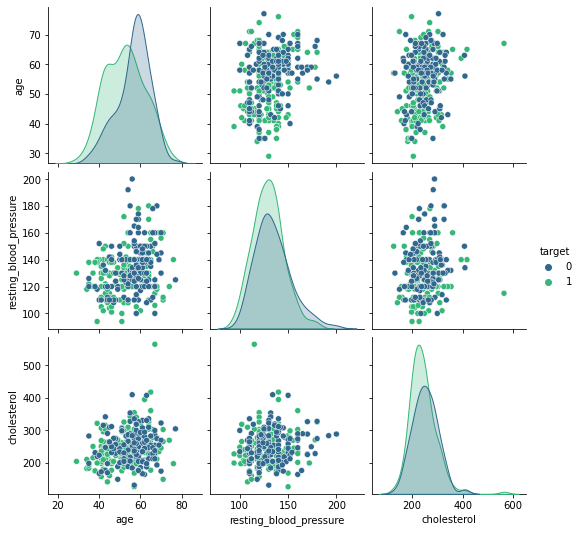

In [80]:
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol'], palette ='viridis' )

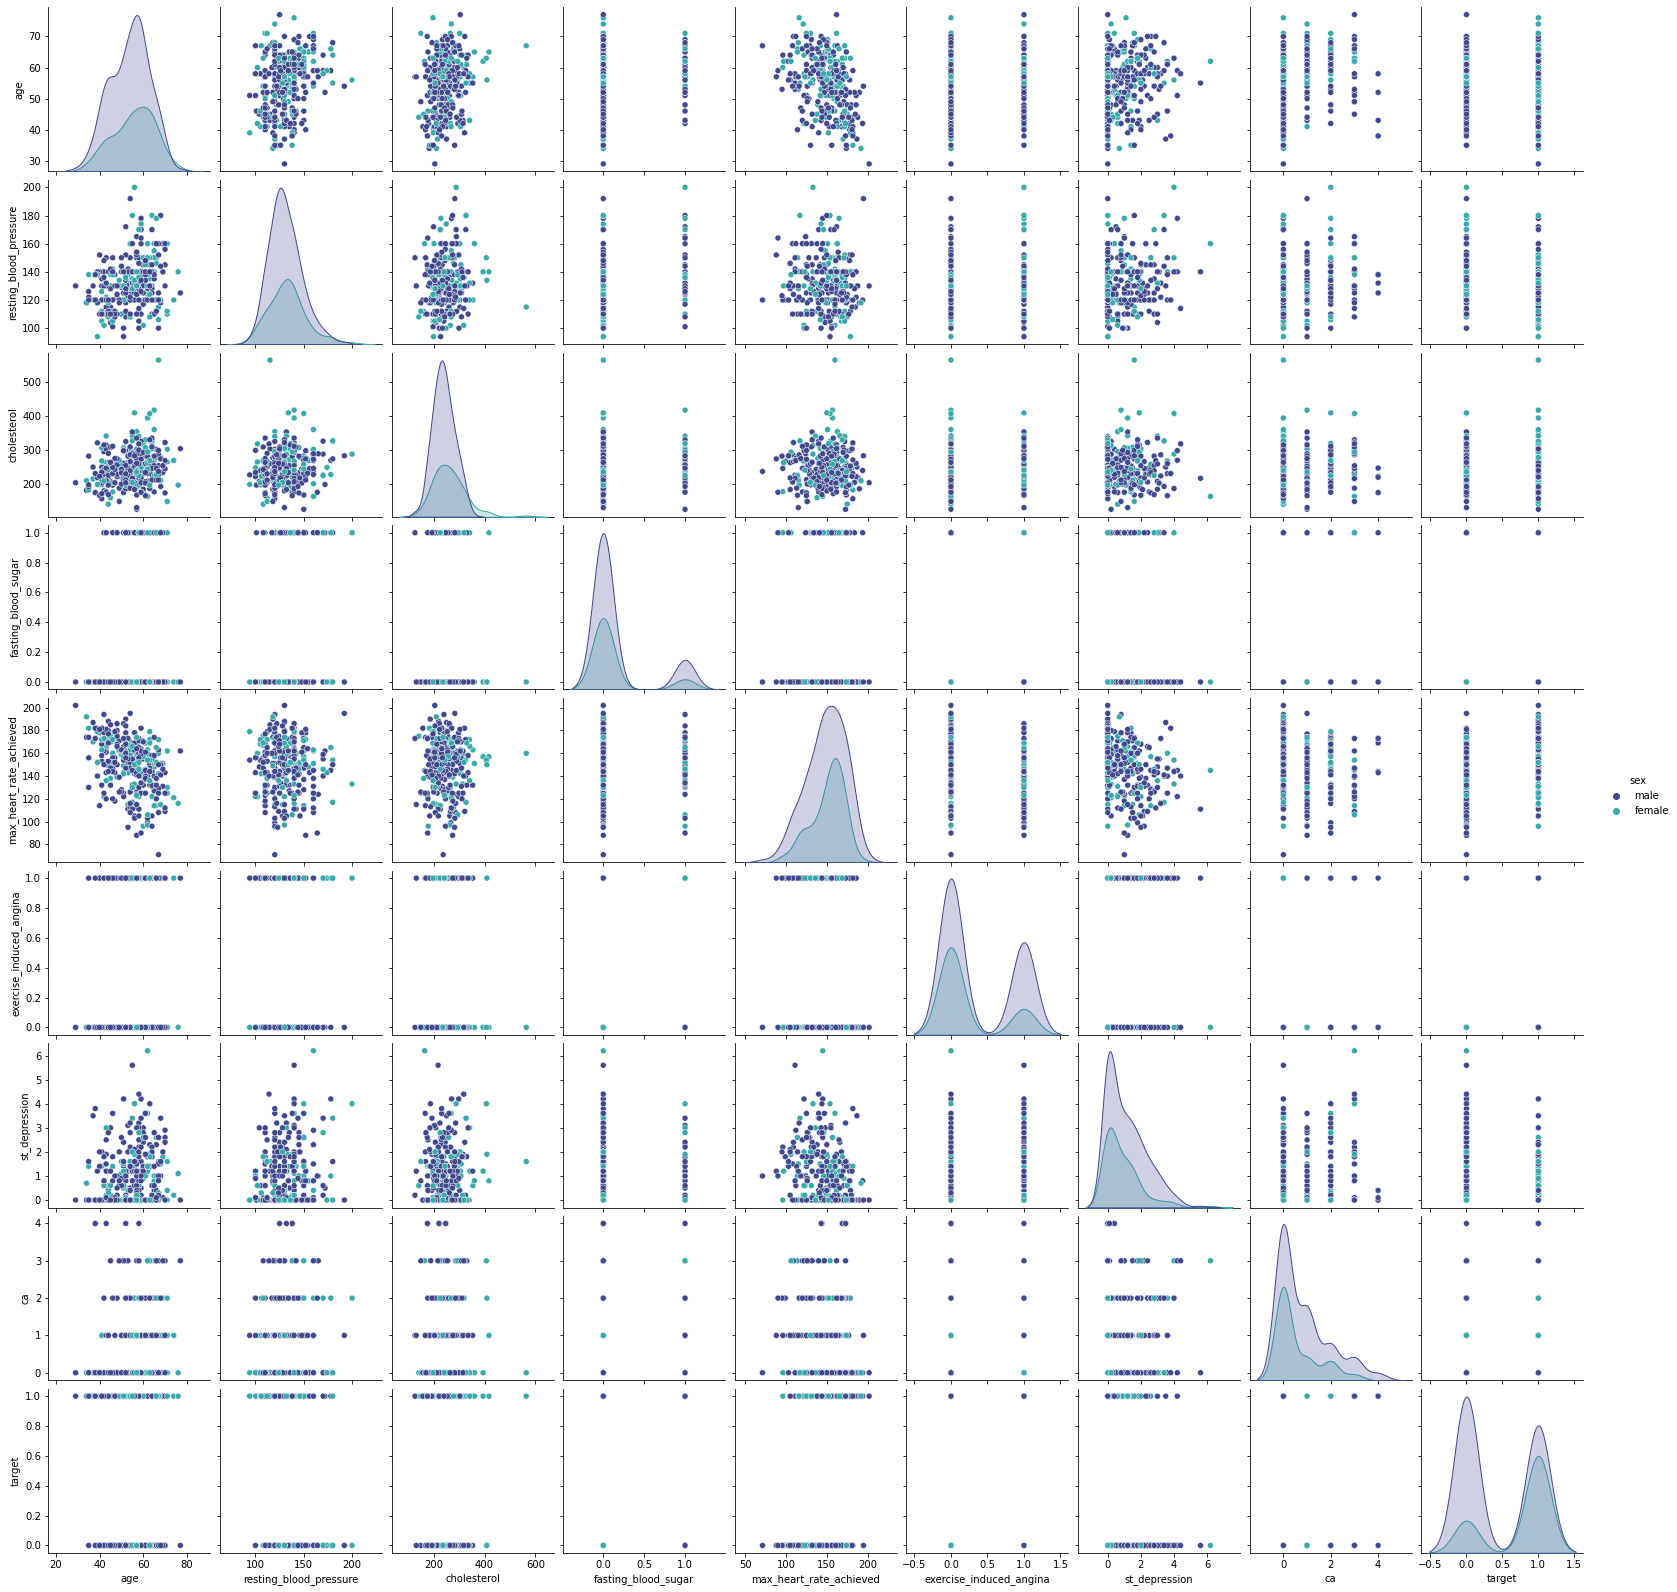

In [81]:
sns.pairplot(df, hue ='sex',palette = 'mako' )

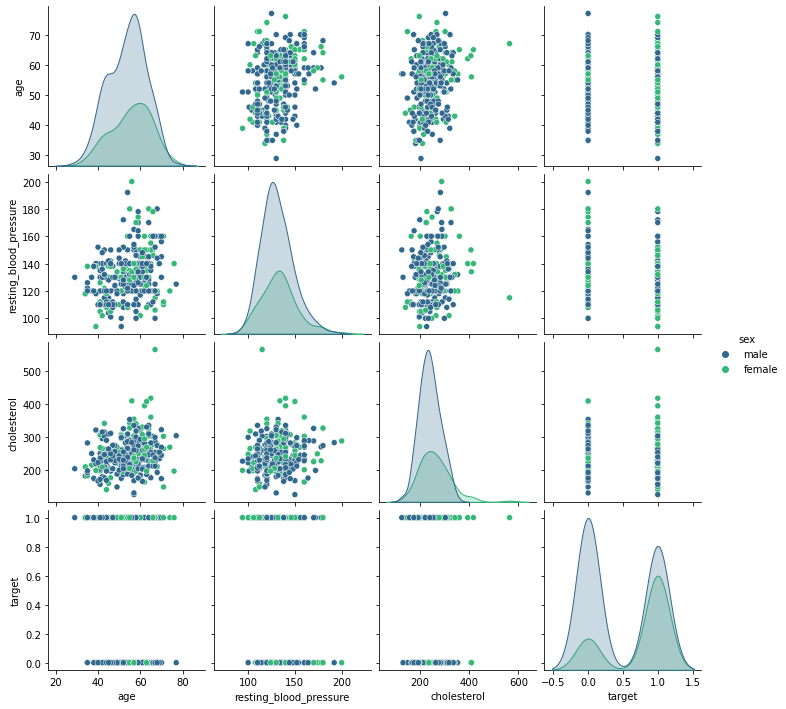

In [82]:
sns.pairplot(df, hue = 'sex', vars = ['age', 'resting_blood_pressure', 'cholesterol', 'target'], palette ='viridis' )

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='cholesterol'>

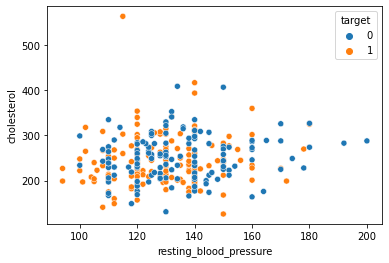

In [83]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = df)

<AxesSubplot:xlabel='resting_blood_pressure', ylabel='age'>

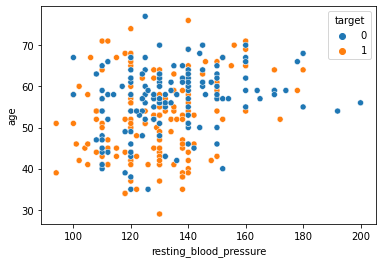

In [84]:
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df)

MAPPING DICTIONARIES FOR REVERSING THE TRANSFORMATIONS

In [85]:
chest_pain_type_mapping = {
    'typical angina ': 0,
    'atypical angina': 1,
    'non-angina pain': 2,
    'asymptomatic': 3
}

rest_ecg_mapping = {
    'normal': 0,
    'Abnormality in ST-T wave': 1,
    'left ventricular hypertrophy': 2
}

st_slope_mapping = {
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
}

thalassemia_mapping = {
    'null': 0,
    'fixed defect': 1,
    'normal blood flow': 2,
    'reversible defect': 3
}

sex_mapping = {
    'male': 1,
    'female': 0
}

# Reverse the transformations
df['chest_pain_type'] = df['chest_pain_type'].map(chest_pain_type_mapping)
df['rest_ecg'] = df['rest_ecg'].map(rest_ecg_mapping)
df['st_slope'] = df['st_slope'].map(st_slope_mapping)
df['thalassemia'] = df['thalassemia'].map(thalassemia_mapping)
df['sex'] = df['sex'].map(sex_mapping)

print(df.dtypes)

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
ca                           int64
thalassemia                  int64
target                       int64
dtype: object


# CORRELATION

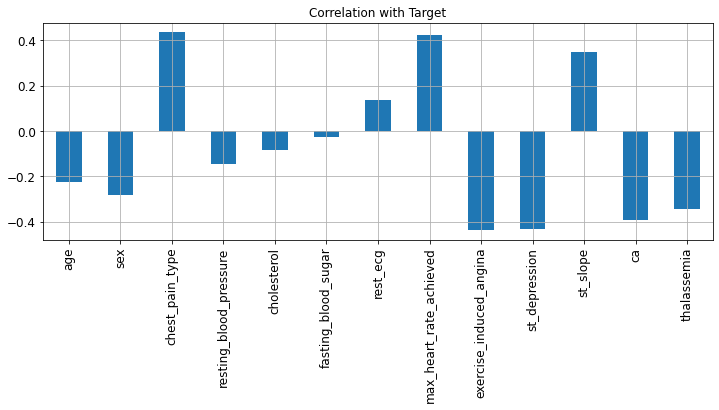

In [98]:
X_df = pd.DataFrame(X, columns=['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope','ca','thalassemia'])
X_df.corrwith(pd.Series(y)).plot.bar(
    figsize=(12, 4), title="Correlation with Target", fontsize=12, rot=90, grid=True)
plt.show()


# SPLITTING THE DATA

In [87]:
data = data.apply(pd.to_numeric)
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [88]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [89]:
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Standardize/Normalize features (optional, depending on the algorithm)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train different machine learning models

    

# MODELING, MODEL TRAINING AND EVALUATION

In [90]:
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {accuracy:.4f}")

Logistic Regression: Accuracy = 0.8525
K-Nearest Neighbors: Accuracy = 0.9016
Naive Bayes: Accuracy = 0.8689


LOGISTIC REGRESSION

Logistic Regression:
Accuracy: 0.8524590163934426
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



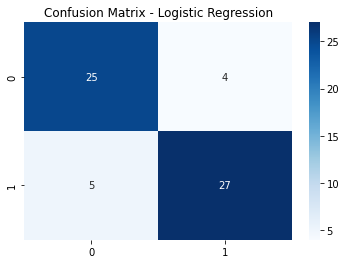

In [91]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

K- NEAREST NEIGHBOURS

K-Nearest Neighbors Classifier:
Accuracy: 0.9016393442622951
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



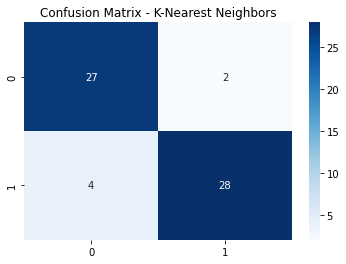

In [92]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - K-Nearest Neighbors")
plt.show()

NAIVE BAYES

Naive Bayes (Gaussian):
Accuracy: 0.8688524590163934
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



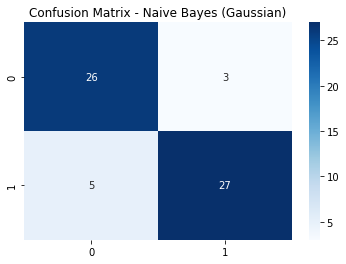

In [93]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate the Naive Bayes model
print("Naive Bayes (Gaussian):")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes (Gaussian)")
plt.show()


# MODEL COMPARISON

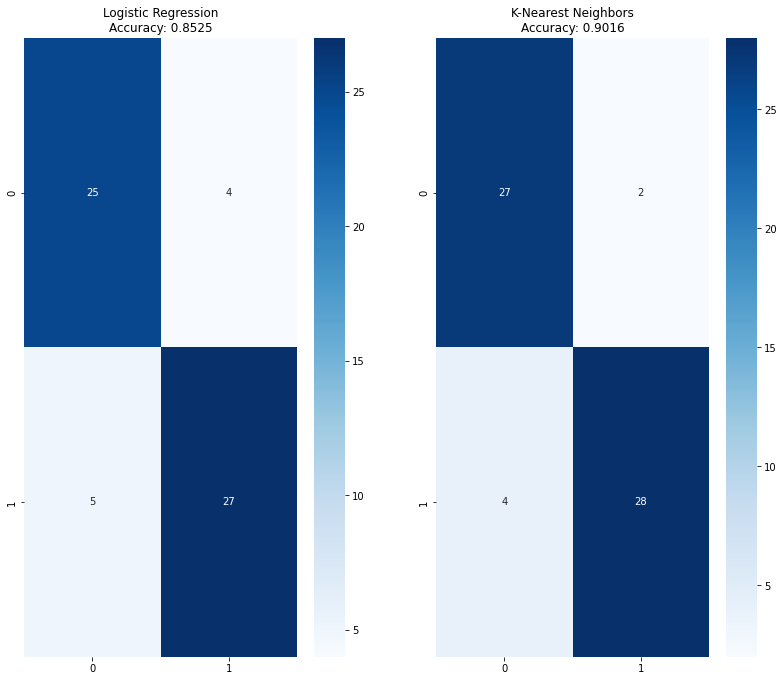

In [94]:
fig, axes = plt.subplots(nrows=len(models)//2, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=4.0)

for (name, model), ax in zip(models.items(), axes.flatten()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot the confusion matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name}\nAccuracy: {accuracy:.4f}")

plt.show()

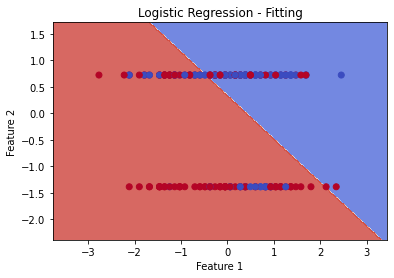

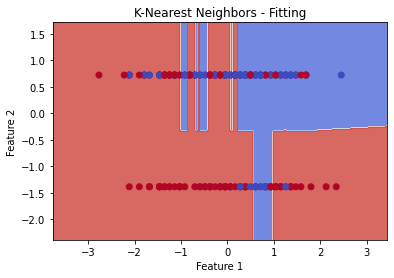

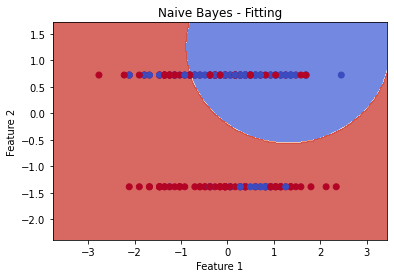

In [95]:

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Standardize the features for better visualization (assuming 2 features)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train[:, :2])

logistic_regression = LogisticRegression()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()


# Fit the models
logistic_regression.fit(X_train_standardized, y_train)
knn.fit(X_train_standardized, y_train)
naive_bayes.fit(X_train_standardized, y_train)


# Plot decision boundaries
plot_decision_boundary(logistic_regression, X_train_standardized, y_train, 'Logistic Regression - Fitting')
plot_decision_boundary(knn, X_train_standardized, y_train, 'K-Nearest Neighbors - Fitting')
plot_decision_boundary(naive_bayes, X_train_standardized, y_train, 'Naive Bayes - Fitting')

The decision boundaries for the various machine learning algorithms considered for coronary artery disease diagnosis exhibit varying degrees of complexity. Logistic regression generates a straightforward linear decision boundary, whereas decision trees and random forests can produce more intricate non-linear decision boundaries. SVMs can produce offset linear decision boundaries, while KNN and neural networks can produce highly complex non-linear decision boundaries. GBMs, being ensembles of weak learners, can produce extremely effective decision boundaries for intricate relationships.

The efficacy of each machine learning algorithm for coronary artery disease diagnosis hinges on the data's complexity. Logistic regression performs moderately well for straightforward rules, while decision trees and random forests excel in handling more complex rules. SVMs are effective for data that is linearly separable, whereas KNN and neural networks are effective in the presence of noise. GBMs, due to their ability to handle complex relationships, are well-suited for coronary artery disease diagnosis.

# PREDICTIONS

In [96]:
input_data_list = [
    [70, 1, 0, 145, 174, 0, 1, 125, 1, 2.6, 0, 0, 3],
    [45, 0, 2, 130, 180, 1, 0, 150, 0, 1.5, 1, 2, 2],
    [60, 1, 1, 140, 240, 0, 2, 170, 1, 3.0, 2, 1, 3],
    [55, 0, 3, 128, 205, 0, 2, 130, 1, 2.0, 1, 1, 2],
    [65, 1, 0, 160, 360, 1, 0, 140, 0, 1.8, 1, 0, 1],
    [50, 0, 2, 120, 220, 0, 0, 160, 0, 1.2, 1, 0, 2],
    [75, 1, 1, 150, 230, 0, 1, 155, 1, 2.5, 2, 1, 3],
    [58, 0, 3, 112, 230, 0, 2, 165, 0, 2.0, 1, 2, 1],
    # Add more instances as needed
]

for input_data in input_data_list:
    # Change the input data to a numpy array
    input_data_as_array = np.asarray(input_data)

    # Reshape the numpy array as we are predicting for only one instance
    input_data_reshaped = input_data_as_array.reshape(1, -1)

    # Make predictions using the loaded model
    prediction = model.predict(input_data_reshaped)

    print("Input Data:", input_data,"\n")
    if prediction[0] == 0:
        print("The patient does not show any symptoms of Coronary Artery")
    else:
        print("The patient shows symptoms for Coronary Artery")
    print()

Input Data: [70, 1, 0, 145, 174, 0, 1, 125, 1, 2.6, 0, 0, 3] 

The patient shows symptoms for Coronary Artery

Input Data: [45, 0, 2, 130, 180, 1, 0, 150, 0, 1.5, 1, 2, 2] 

The patient shows symptoms for Coronary Artery

Input Data: [60, 1, 1, 140, 240, 0, 2, 170, 1, 3.0, 2, 1, 3] 

The patient shows symptoms for Coronary Artery

Input Data: [55, 0, 3, 128, 205, 0, 2, 130, 1, 2.0, 1, 1, 2] 

The patient shows symptoms for Coronary Artery

Input Data: [65, 1, 0, 160, 360, 1, 0, 140, 0, 1.8, 1, 0, 1] 

The patient shows symptoms for Coronary Artery

Input Data: [50, 0, 2, 120, 220, 0, 0, 160, 0, 1.2, 1, 0, 2] 

The patient shows symptoms for Coronary Artery

Input Data: [75, 1, 1, 150, 230, 0, 1, 155, 1, 2.5, 2, 1, 3] 

The patient shows symptoms for Coronary Artery

Input Data: [58, 0, 3, 112, 230, 0, 2, 165, 0, 2.0, 1, 2, 1] 

The patient shows symptoms for Coronary Artery



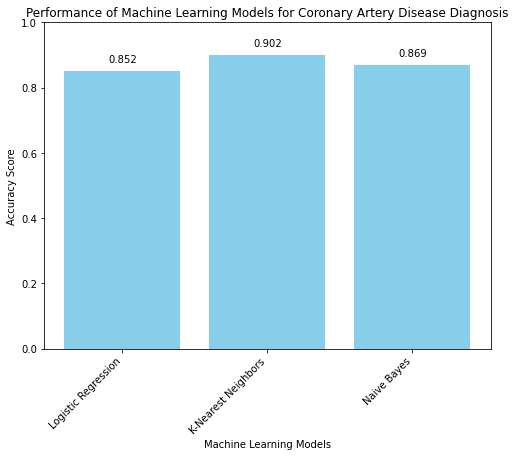

In [97]:

# Assuming you have previously evaluated the models and obtained accuracy scores
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_nb = accuracy_score(y_test, y_pred_nb)


# Define the models and their respective accuracy scores
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes']
accuracy_scores = [accuracy_lr, accuracy_knn, accuracy_nb]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Score')
plt.title('Performance of Machine Learning Models for Coronary Artery Disease Diagnosis')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for better visualization
plt.xticks(rotation=45, ha='right')

# Display the accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.02, f'{score:.3f}', ha='center', va='bottom')

plt.show()
